<a href="https://colab.research.google.com/github/MohammadParsaTheFirst/Deep-generative-models-course/blob/main/CHW1/DGM_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Deep Generative Models
</font>
<hr/>
<font color="#800080" size=5>
Assignment 1 : Deep Autoregressive Models
<br>
</font>
<font size=5>
Instructor: Dr. S. Amini
<br>
</font>
<font size=4>
Fall 2024
<br>
</font>
<font face="Times New Roman" size=4>
Deadline: Month day at 23:55
</font>
<hr>
<font color='red'  size=4>
Note: It is highly recommended to run your notebook on Google Colab or Kaggle
<br>
</font>
<font face="Times New Roman" size=4 align=center>
Feel free to ask your questions in Telegram : @ilia_ad7
</font>
<br>
<hr>
</div></font>

In [ ]:
Name = "MohammadParsa Dini"
StudentId = "400101204"

# Introduction

Deep autoregressive models are sequence models, yet feed-forward (i.e. not recurrent); generative models, yet supervised. They are a compelling alternative to RNNs for sequential data, and GANs for generation tasks.

Moreover, a deep autoregressive model is merely a feed-forward model which predicts future values from past values.

However, you may think that the term **Autoregressive** is equivalent to **Deep Autoregressive**; But actually, it is not true! Autoregressive Linear Models like `ARMA` or `ARCH` have been used in statistics, econometrics and financial modelling for ages and are not **Deep**. In this exercise, we work with deep ones.

### Mathematical Description
The mathematical foundation of autoregressive models is based on the chain rule of probability. We can factorize the joint distribution over the n-dimensions as:

$$p(x) = \prod_{i=1}^{n} p(x_i | x_1, x_2, …, x_{i-1}) = \prod_{i=1}^{n} p(x_i | x_{<i})$$

where $x_{<i} = [x_1, x_2, …, x_{i-1}]$ denotes the vector of random variables with index less than $i$.

### Advantages and Disadvantages
Autoregressive models are naturally strong generative models that constitute one of the current state-of-the-art architectures on likelihood-based image modeling, and are also the basis for large language generation models such as GPT3. Similar to the language generation, autoregressive models work on images by modeling the likelihood of a pixel given all previous ones. For instance, in the picture below, we model the pixel $x_i$ as a conditional probability distribution based on all previous (here blue) pixels (figure credit - [Aaron van den Oord et al.](https://arxiv.org/abs/1601.06759)):

<center style="padding: 10px"><img src="AR_ImageProcessing.svg" height="300px"></center>

Learning these conditionals is often much simpler than learning the joint distribution $p(\mathbf{x})$ all together. However, disadvantages of autoregressive models include slow sampling, especially for large images, as we need height-times-width forward passes through the model. In addition, for some applications, we require a latent space as modeled in VAEs and Normalizing Flows. For instance, in autoregressive models, we cannot interpolate between two images because of the lack of a latent representation.

### Some Architectures and Applications of Autoregressive Models

- `PixelCNN` by Google DeepMind was probably the first deep autoregressive model, and the progenitor of most of the other models below. Ironically, the authors spend the bulk of the paper discussing a recurrent model, PixelRNN, and consider PixelCNN as a “workaround” to avoid excessive computation. However, PixelCNN is probably this paper’s most lasting contribution.
- `PixelCNN++` by OpenAI is, unsurprisingly, PixelCNN but with various improvements.
- `WaveNet` by Google DeepMind is heavily inspired by PixelCNN, and models raw audio, not just encoded music. They had to pull a neat trick from telecommunications/signals processing in order to cope with the sheer size of audio (high-quality audio involves at least 16-bit precision samples, which means a 65,536-way-softmax per time step!)
- `Transformer`, a.k.a. the “attention is all you need” model by Google Brain is now a mainstay of NLP, performing very well at many NLP tasks and being incorporated into subsequent models like BERT.

# Install Pre-requirements

In [1]:
!pip install -q yfinance
!pip install --quiet pytorch-lightning>=1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 15.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 43.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 63.2 MB/s eta 0:00:00


-------------------------------------------------------------------------------
# Question 1 : LSTM

### **The Model**
In this exercise, we will explore the application of Long Short-Term Memory (LSTM) networks, a type of recurrent neural network, to predict stock prices. LSTMs are particularly suited for this task due to their ability to capture long-term dependencies in time series data.

We will treat this as an autoregressive problem, where we use past stock prices to predict future ones. Autoregressive models are widely used in time series forecasting, and they can capture complex patterns in the data.

The goal of this exercise is to familiarize you with the process of training an LSTM network and using it for prediction. You will learn how to preprocess time series data, visualize it, construct an LSTM model, train it on historical stock price data, and evaluate its performance.

Remember, predicting stock prices is a complex task and the aim of this exercise is not to create a model for making actual investment decisions, but rather to understand the potential applications of LSTM networks in time series forecasting.

### **The Dataset**
The initial phase of our process involves the acquisition and loading of requisite data into memory. Our primary data source will be Yahoo Finance, a comprehensive platform renowned for its extensive repository of financial market data and its suite of tools designed to identify promising investment opportunities. To facilitate the extraction of data from Yahoo Finance, we will employ the yfinance library, which provides a Pythonic and multi-threaded approach to downloading market data.

## Load the Data

The process begins with data acquisition from Yahoo Finance and loading it into memory. Yahoo Finance is utilized for its extensive financial market data. The yfinance library, known for its efficient and Python-friendly approach, is used to download this data.

In [ ]:
# Import necessary libraries here. You may add other libraries to suit your needs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas_datareader as pdr
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime
import torch
import torch.nn as nn
import torch.nn.init as init
from torch.autograd import Variable
import random
from sklearn.preprocessing import MinMaxScaler


def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
set_seed(47)

# Set up plot style
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# the yahoo finance dataset in a dataframe
yf

# Define the list of tech stocks for analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up the start and end times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data and assign it to global variables
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

# Define the list of companies and their names
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Add company name to each dataframe
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate all company dataframes
df = pd.concat(company_list, axis=0)

# Display the last 10 rows of the dataframe
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-10-04,185.750000,187.600006,183.600006,186.509995,186.509995,40890300,AMAZON
2024-10-07,182.949997,183.600006,180.250000,180.800003,180.800003,42364200,AMAZON
2024-10-08,181.919998,183.089996,180.919998,182.720001,182.720001,26372100,AMAZON
2024-10-09,182.820007,185.850006,182.050003,185.169998,185.169998,26343100,AMAZON
2024-10-10,187.130005,188.130005,185.830002,186.649994,186.649994,27785000,AMAZON
2024-10-11,186.630005,189.929993,186.300003,188.820007,188.820007,25751600,AMAZON
2024-10-14,189.779999,189.830002,187.360001,187.539993,187.539993,22614400,AMAZON
2024-10-15,187.630005,188.410004,184.580002,187.690002,187.690002,32178900,AMAZON
2024-10-16,187.050003,187.779999,185.610001,186.889999,186.889999,23456800,AMAZON


--------------------------------------------------------------------------------
## Statistical Analysis

The `.describe()` function generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding `NaN` values. It can analyze both numeric and object series, as well as DataFrame column sets of mixed data types. The output varies based on the input data.

Use this function to generate a concise statistical summary of one of the stocks.

In [ ]:
##### Step 1: Statistical summary #####
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,232.222786,234.239106,230.084256,232.265850,231.762114,3.624125e+07
std,103.973975,104.555579,103.093603,103.882869,103.476794,2.434255e+07
min,120.629997,121.639999,118.349998,119.570000,119.570000,7.409100e+06
25%,166.043747,167.532501,164.452499,165.667500,165.390404,1.891522e+07
50%,183.790001,185.264999,182.120003,183.790001,183.645004,3.041050e+07
75%,258.727497,260.882496,255.915001,257.782509,256.970467,4.720992e+07
max,467.000000,468.350006,464.459991,467.559998,466.718781,3.186799e+08


---------------------------------------------------------------------------------
Now, using the `.info()` method, provide a concise summary of the DataFrame. This includes information such as:
1. The number of entries (rows)
2. The number of columns
3. The names of the columns
4. The number of non-null values in each column
5. The data type of each column (e.g., integer, float, object)

In [ ]:
##### Step 2: DataFrame summary #####
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-10-16 to 2024-10-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1000 non-null   float64
 1   High          1000 non-null   float64
 2   Low           1000 non-null   float64
 3   Close         1000 non-null   float64
 4   Adj Close     1000 non-null   float64
 5   Volume        1000 non-null   int64  
 6   company_name  1000 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.5+ KB


----------------------------------------------------------------------------------
The closing price, the last traded price during a regular trading day, is a key benchmark for tracking stock performance.
Let's visualize the historical closing prices for our list of companies.

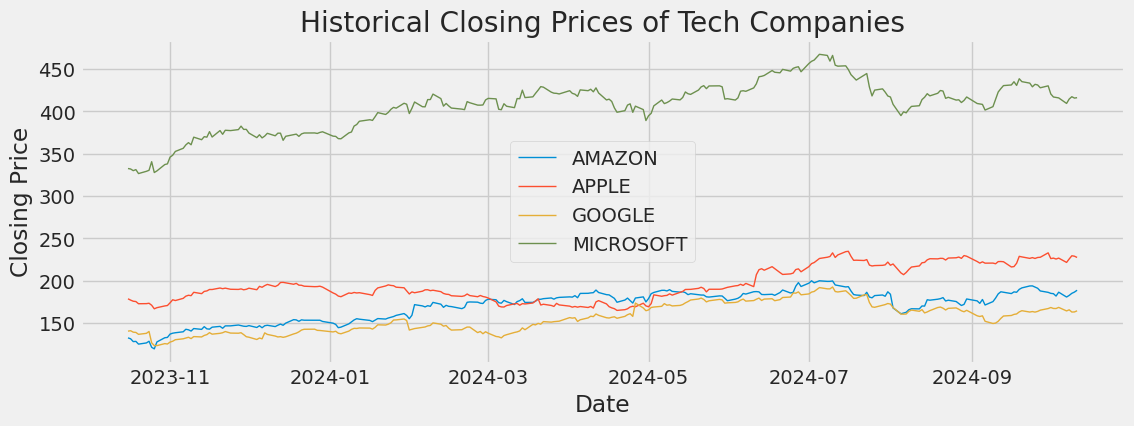

In [ ]:
##### Step 3: Visualize the historical closing prices #####
import matplotlib.pyplot as plt

# The closing price is the last price at which a security traded during the regular trading day
# Extract trading volume data
closing_prices = df.pivot(columns="company_name", values="Close")

# Plot line charts
plt.figure(figsize=(12, 4))
for company in closing_prices.columns:
    plt.plot(closing_prices.index, closing_prices[company], label=company, linewidth=1)

plt.title("Historical Closing Prices of Tech Companies")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.legend()
plt.show()

---------------------------------------------------------------------------------
Volume refers to the number of shares traded during a certain period, often a day. It's a key metric for technical traders.
Let's visualize the daily trading volume for our list of companies.

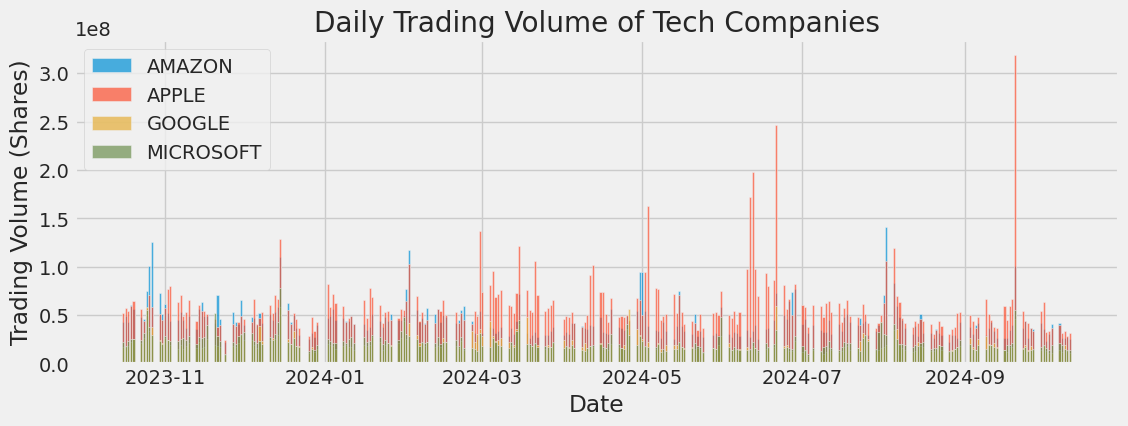

In [ ]:
##### Step 4: Visualize the trading volume #####
import matplotlib.pyplot as plt

# Extract trading volume data
volume_data = df.pivot(columns="company_name", values="Volume")

# Plot bar charts
plt.figure(figsize=(12, 4))
for company in volume_data.columns:
    plt.bar(volume_data.index, volume_data[company], label=company, alpha=0.7)
plt.title("Daily Trading Volume of Tech Companies")
plt.xlabel("Date")
plt.ylabel("Trading Volume (Shares)")
plt.grid(True)
plt.legend()
plt.show()


---------------------------------------------------------------------------------
A stock moving average (MA) is a widely used technical indicator in financial analysis that helps smooth out price trends by filtering out the noise from random short-term price fluctuations. It is calculated by taking the arithmetic mean of a given set of prices over a specified period.

The moving average can be of different types, such as Simple Moving Average (SMA) and Exponential Moving Average (EMA). SMA is calculated by taking the arithmetic mean of a given set of prices over a specified period. On the other hand, EMA places greater weight on more recent prices than older ones over the time period.

Here, you should calculate and plot the 10, 20, and 50-day moving averages along with the adjusted close price for each company. The moving averages are calculated using the `rolling` method, which applies a function (in this case, mean) to a rolling window of data. The plots provide a visual representation of the stock price trends over time.

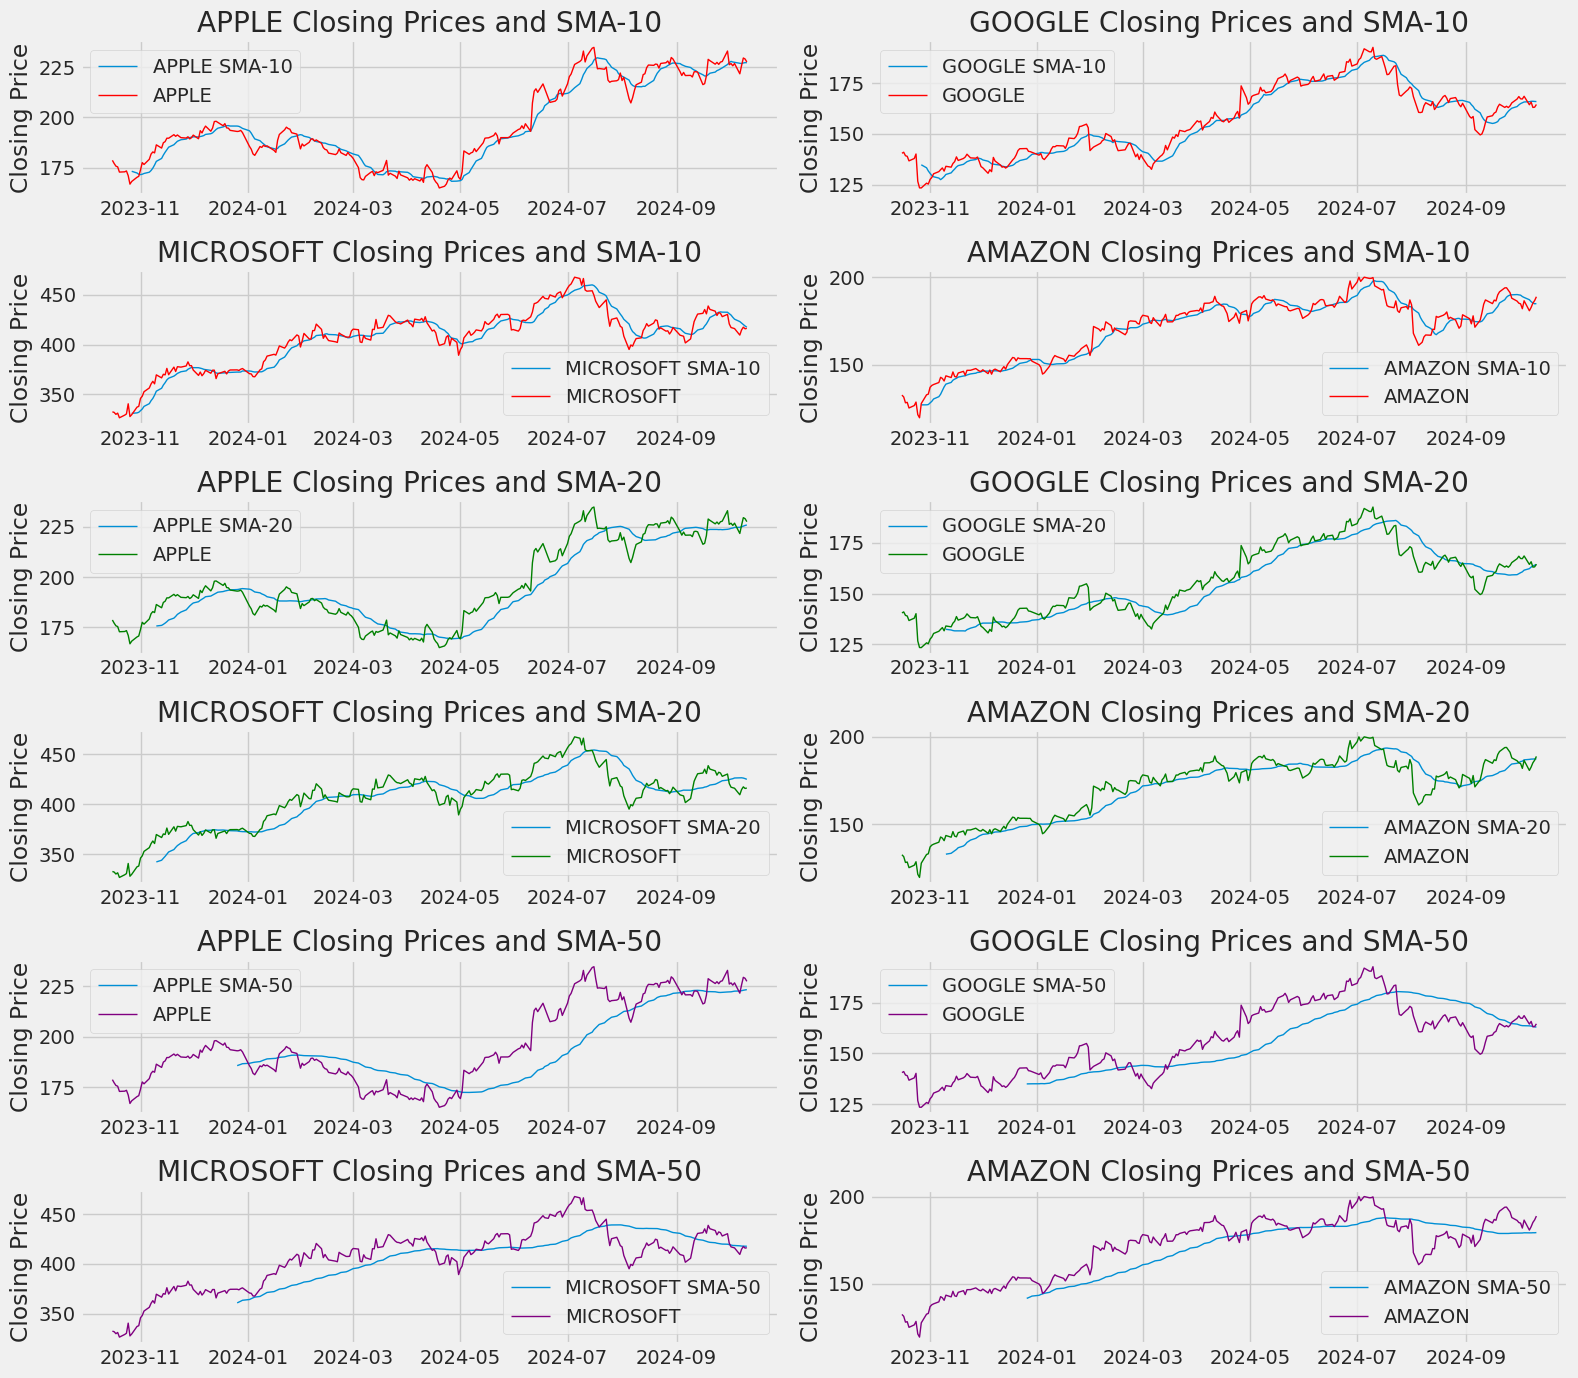

In [ ]:
##### Step 5: Calculate and plot the 10, 20, and 50-day moving averages along with the adjusted close price #####
import matplotlib.pyplot as plt

company_list = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']
closing_prices = df.pivot(columns='company_name', values='Close')
# Define moving average days
ma_day = [10, 20 , 50]

sma_filtered = []
for m in ma_day:
    sma_filtered.append(closing_prices.rolling(m).mean())
closing_prices.dropna(inplace=True)

colors = ['red' , 'green' , 'purple']

plt.figure(figsize=(16,14))
for j in range(3):
    for i in range(4):
        plt.subplot(6, 2, 1 + 4*j + i)
        curr_company = company_list[i]
        plt.plot(closing_prices.index, sma_filtered[j][curr_company], label=f'{curr_company} SMA-{ma_day[j]}', linewidth=1)
        plt.plot(closing_prices.index, closing_prices[curr_company], label=curr_company, linewidth=1, color = colors[j])
        plt.title(f'{curr_company} Closing Prices and SMA-{ma_day[j]}')
        plt.ylabel('Closing Price')
        plt.grid(True)
        plt.legend()

plt.tight_layout()
plt.show()


Now answer this **Question:**

Which moving average is the best choice for predicting the trends? Justify your answer.



Explain your **Answer:**

<span style="color:red">
$\rightarrow $The fewer the number of days, the better the result. When too many elements are included in this moving average, it excessively smoothens the signal. Consequently, immediate changes/fluctuations are not preserved locally, and distant data points have the same effect as those near the local point.
However, having a narrow window for SMA filter, will make the curve to fit and follow the original data which is not good.
So there is a tradeoff here, but in this case, $m=10$ days appear to be a proper length for SMA filter.
</span>


------------------------------------------------------------
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve daily returns for all stocks. We'll use `pct_change` to find the percent change for each day.

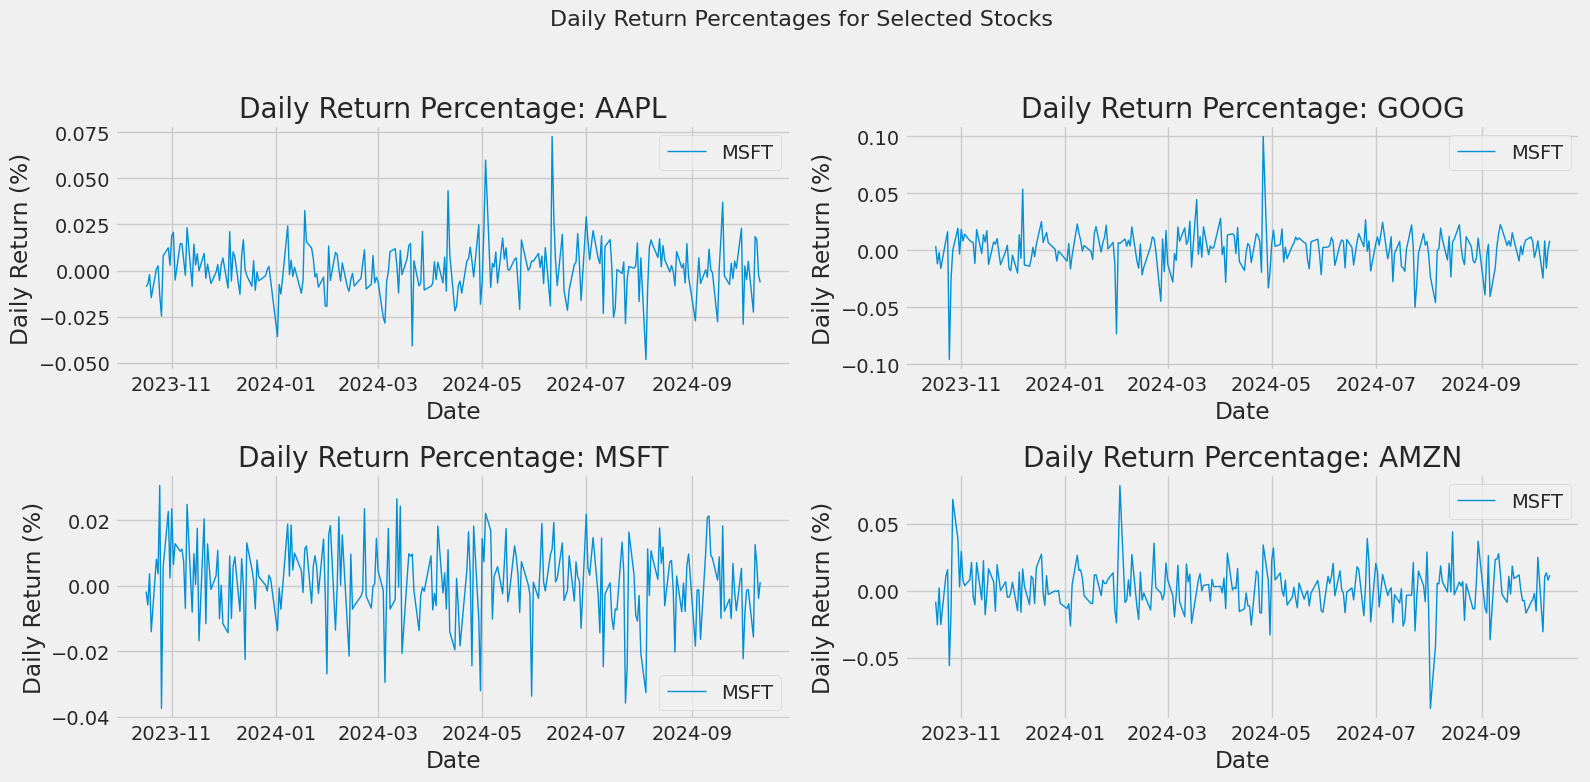

In [ ]:
##### Step 6: Plot the daily return precentages #####
# To calculate daily returns, subtract the closing price of an asset on one day
# from its closing price on the previous day, then divide the result by the closing price of the previous day.
company_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

AAPL_daily_return = AAPL['Adj Close'].pct_change().tolist()
GOOG_daily_return = GOOG['Adj Close'].pct_change().tolist()
MSFT_daily_return = MSFT['Adj Close'].pct_change().tolist()
AMZN_daily_return = AMZN['Adj Close'].pct_change().tolist()
daily_returns = [AAPL_daily_return, GOOG_daily_return, MSFT_daily_return, AMZN_daily_return]

plt.figure(figsize=(16,8))
for i in range(4):
    plt.subplot(2,2,1+i)
    plt.plot(closing_prices.index, daily_returns[i], label=company_list[j], linewidth=1)
    plt.title(f'Daily Return Percentage: {company_list[i]}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return (%)')
    plt.legend()
    plt.grid(True)

plt.suptitle('Daily Return Percentages for Selected Stocks', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()

-------------------------------------------------------------------------------
Now let's get an overall look at the daily returns by creating a histogram for

1.   List item
2.   List item

the `Daily Return` of each company in the `company_list`.

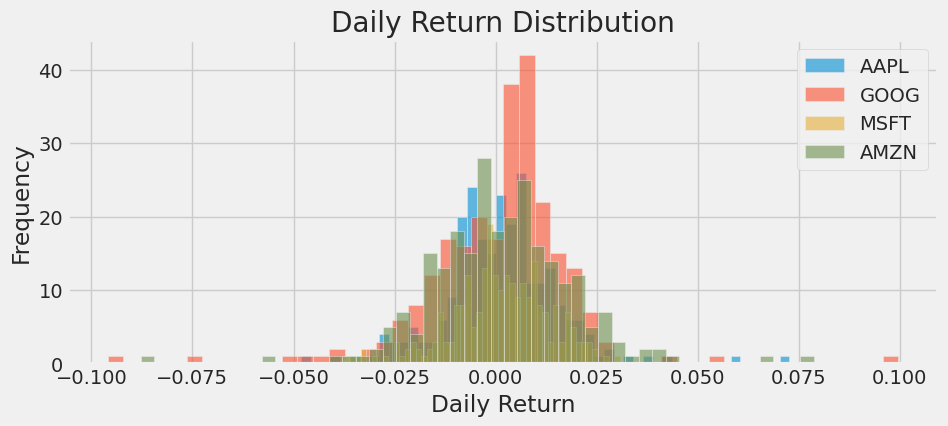

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine all daily returns into a single dataframe
all_returns = pd.concat([AAPL['close_to_close_return'], GOOG['close_to_close_return'], MSFT['close_to_close_return'], AMZN['close_to_close_return']], axis=1)
all_returns.columns = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Create histograms
plt.figure(figsize=(10, 4))
for col in all_returns.columns:
    plt.hist(all_returns[col].dropna(), bins=50, alpha=0.6, label=col)

plt.title('Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


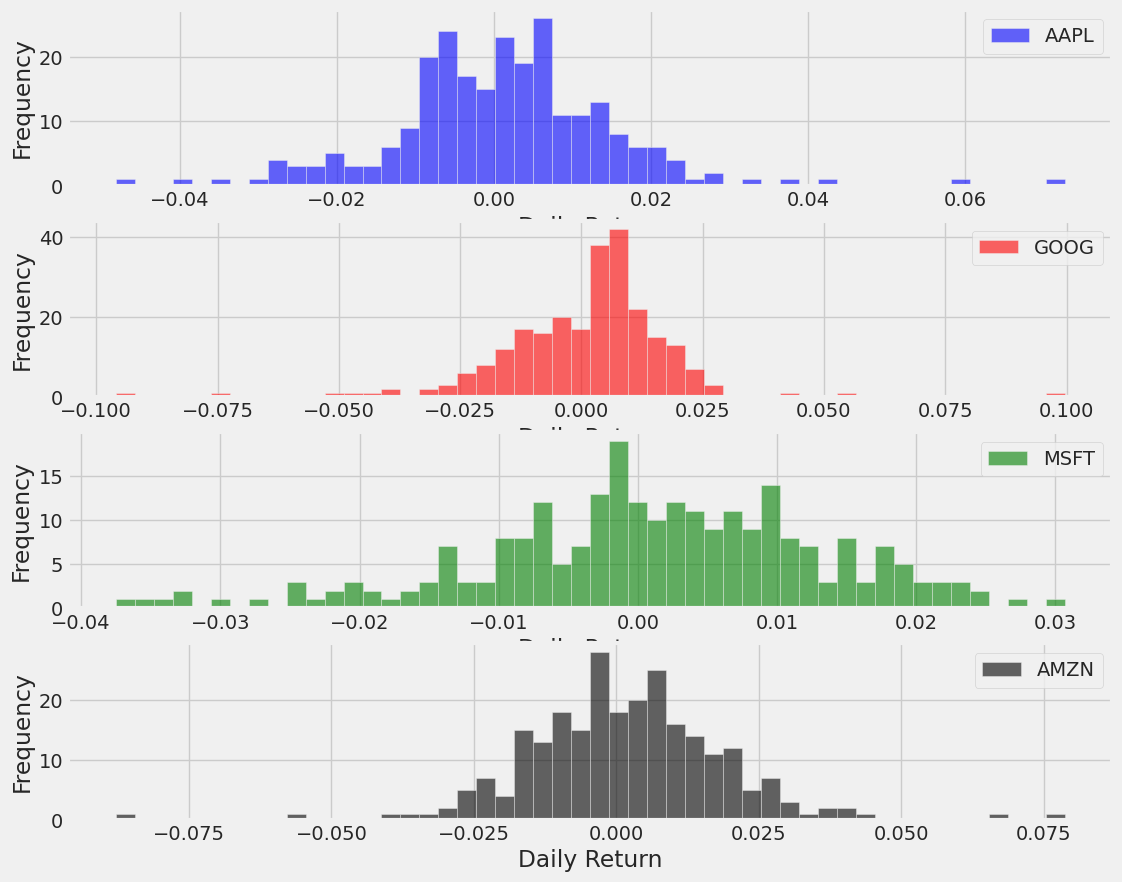

In [ ]:
i = 1
plt.figure(figsize=(12,10))
colors = ['blue','red','green','black']
for col in all_returns.columns:
    plt.subplot(4,1,i)
    plt.hist(all_returns[col].dropna(), bins=50, alpha=0.6, label=col, color = colors[i-1])
    i += 1
    plt.legend()
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    #plt.xlim([-0.1, 0.1])
    #plt.ylim([0,50])

--------------------------------------------------------------------------------
## Correlation between Different Stocks Closing Prices

Correlation is a statistical measure that quantifies the degree of relationship between two variables. It provides an indication of how changes in one variable are associated with changes in another. The correlation coefficient ranges between -1.0 and +1.0. A correlation of +1.0 indicates a perfect positive correlation, meaning that both variables move in the same direction together. A correlation of -1.0 indicates a perfect negative correlation, meaning that the variables move in opposite directions. If the correlation is 0, it means there is no relationship between the variables. However, it's important to note that correlation does not imply causation. Even if two variables are correlated, it does not mean that changes in one variable are causing changes in another. There could be a third factor influencing both variables.

In the context of stock analysis, suppose we are interested in examining the returns of all the stocks in our list. To facilitate this, we can construct a DataFrame that consolidates the `Adj Close` columns from each of the individual stock dataframes. This will provide us with a comprehensive view of the closing prices for all stocks, enabling more efficient comparative analysis.

In [ ]:
# Get the closing prices for all stocks in the tech list
data = yf.download(tech_list, start=start, end=end)

# Select only the 'Adj Close' column for each stock
closing_df = data['Adj Close']

# Calculate the daily returns for each stock
tech_rets = closing_df.pct_change()

# Display the first few rows of the returns DataFrame
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-16 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-10-17 00:00:00+00:00,-0.008785,-0.008148,0.003559,-0.001744
2023-10-18 00:00:00+00:00,-0.007395,-0.025405,-0.012129,-0.005872
2023-10-19 00:00:00+00:00,-0.002161,0.002107,-0.002154,0.003665
2023-10-20 00:00:00+00:00,-0.014704,-0.025156,-0.016117,-0.014035


--------------------------------------------------------------------------------
Now we can compare the daily percentage return of all pairs to check how they are correlated.

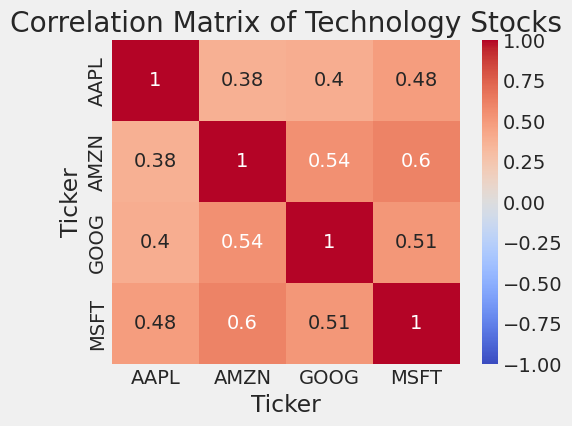

In [ ]:
##### Step 8: Plot the correlation regression plot for all pairs #####
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = tech_rets.corr()

# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Technology Stocks')
plt.show()


Now, answer this **Question:**

What implications might a linear relationship have for investment strategies?

Explain your **Answer:**

----------------------------------------------------------------------------
Finally, Let's create two heatmaps: one for the correlation between the daily returns of the stocks and another for the correlation between the closing prices of the stocks. This provides a visual and numerical understanding of the relationships between different stocks.

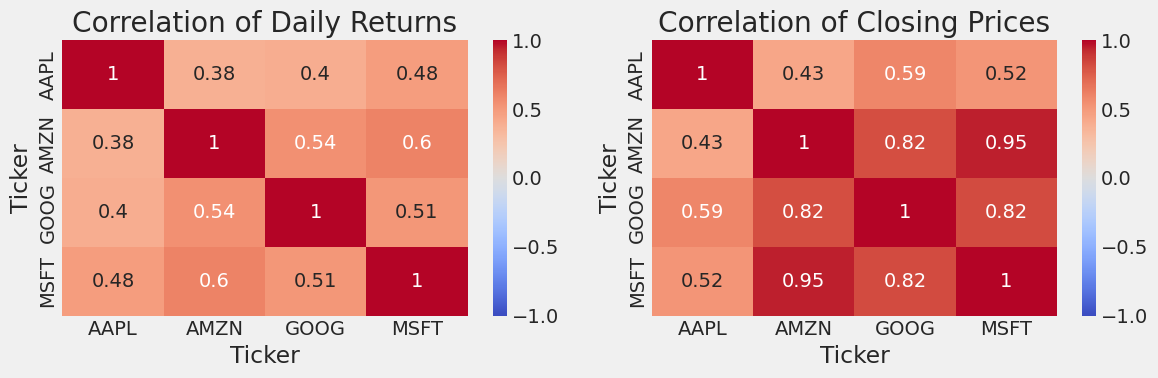

In [ ]:
##### Step 9: Plot correlation heatmaps #####
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrices
daily_returns_corr = tech_rets.corr()
closing_prices_corr = closing_df.corr()

# Create subplots for both heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Heatmap for daily returns correlation
sns.heatmap(daily_returns_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Correlation of Daily Returns')

# Heatmap for closing prices correlation
sns.heatmap(closing_prices_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Correlation of Closing Prices')

plt.tight_layout()
plt.show()


Now, answer this **Question:**

Which pair has the strongest correlation of daily return stocks? What other interesting facts could be infered from the plots above?

Explain your **Answer:**
<span style="color:red">
$\rightarrow$ We can observe a strong correlation between Amazon and Microsoft. This is evident from the correlation matrix for `Daily Returns` and `Closing Price`, where the (`AMZN`,`MSFT`) tuple shows the highest correlation value.
</span>


---------------------------------------------------------------------------------
## Predicting the Closing Price

In this section, we will try to predict the closing price of a stock using an LSTM model. Choose one stock and after visualizing the closing history, do any preprocessing you need and create a training data set.

In [ ]:
##### Step 10: Download and display the head of a stock from Yahoo Finance (start='2012-01-01') #####
import yfinance as yf

# Define the stock symbol (ticker)
stock_symbols = ['AAPL', 'GOOG', ' MSFT', 'AMZN']
# Fetch historical market data from Yahoo Finance
sym = stock_symbols[0]
stock_data = yf.Ticker(sym).history(start='2012-01-01')

stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,12.347438,12.440933,12.335374,12.402630,302220800,0.0,0.0
2012-01-04 00:00:00-05:00,12.365529,12.506677,12.343814,12.469278,260022000,0.0,0.0
2012-01-05 00:00:00-05:00,12.514824,12.623398,12.446058,12.607716,271269600,0.0,0.0
2012-01-06 00:00:00-05:00,12.660194,12.750070,12.643606,12.739514,318292800,0.0,0.0
2012-01-09 00:00:00-05:00,12.833005,12.900864,12.707841,12.719302,394024400,0.0,0.0


-------------------------------------------------------------------------------------------------

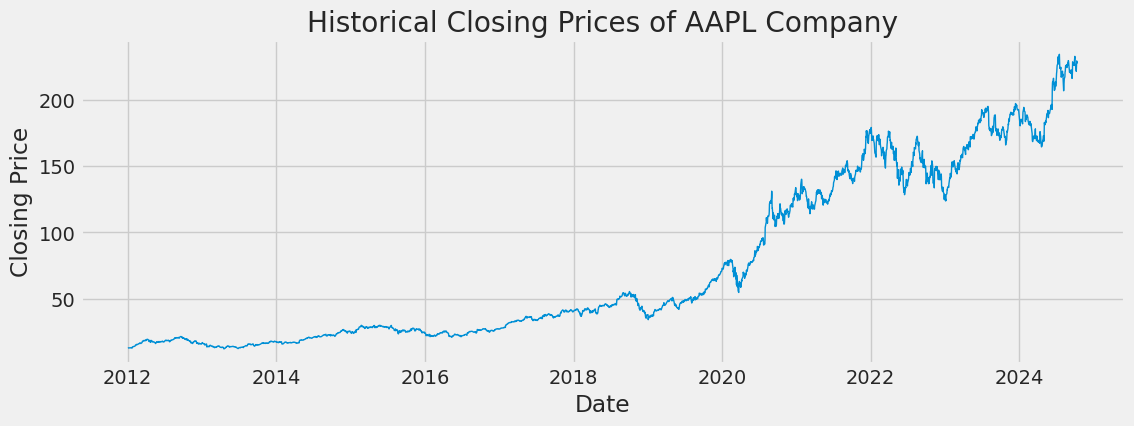

In [ ]:
##### Step 11: Plot the closing price history of your stock #####
sym = 'AAPL'
closing_price_data = stock_data['Close'].tolist()

plt.figure(figsize=(12,4))
plt.plot(stock_data.index, closing_price_data, linewidth=1)
plt.title(f"Historical Closing Prices of {sym} Company")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

-------------------------------------------------------------------------------------------------

In [ ]:
##### Step 12: Preparing the data (Use a 95-5 Train/Test ratio) #####
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split

# Downloading the dataset
sym = 'AAPL'
stock_data = yf.Ticker(sym).history(start='2012-01-01')
closing_price_data = stock_data['Close'].values

# Splitting the data into train and test sets (95-5 ratio)
train_data, test_data = train_test_split(closing_price_data, test_size=0.05, shuffle=False)

print(f'Training data length: {len(train_data)}')
print(f'Test data length: {len(test_data)}')


Training data length: 3058
Test data length: 161


---------------------------------------------------------------------------------------------

In [ ]:
##### Step 13: Scaling the data #####
from sklearn.preprocessing import MinMaxScaler

# Reshape data to fit the scaler
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [ ]:
##### Step 14: Creating the training and test data sets #####
# Function to create dataset
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Using a look_back period of 60 days
look_back = 60
X_train, y_train = create_dataset(scaled_train_data, look_back)
X_test, y_test = create_dataset(scaled_test_data, look_back)

# Reshape inputs to fit LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (2998, 60, 1)
y_train shape: (2998,)
X_test shape: (101, 60, 1)
y_test shape: (101,)


---------------------------------------------
Now, define your model here

In [ ]:
##### Step 15: Define your model ######
# LSTM Model
# Define LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size1, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size1, hidden_size2)
        self.fc_out = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size1).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size1).to(x.device)
        # Forward propagate LSTM
        out, (hn, cn) = self.lstm(x , (h0, c0))
        # Decode the hidden state of the last time step
        out = self.relu(self.fc(out[:,-1]))
        out = self.fc_out(out)

        return out

# Set Hyper-parameters
num_epochs = 100
learning_rate = 0.01
input_size = 1
hidden_size1 = 50
hidden_size2 = 50
num_layers = 1
seq_length = 60
output_size = 1

lstm = LSTM(input_size, hidden_size1, hidden_size2, num_layers, output_size)

# Loss and Optimizer
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

In [ ]:
##### Step 16: Train the model #####

import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# Prepare the data for PyTorch
X_train_torch = torch.from_numpy(X_train).float()  # Add feature dimension
y_train_torch = torch.from_numpy(y_train).float().unsqueeze(-1)

X_test_torch = torch.from_numpy(X_test).float()
y_test_torch = torch.from_numpy(y_test).float().unsqueeze(-1)

train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_loader):
        # Forward pass
        outputs = lstm(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test data
lstm.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        outputs = lstm(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

    test_loss /= len(test_loader)
    print(f'Test Loss: {test_loss:.4f}')


Epoch [10/100], Loss: 0.0001
Epoch [20/100], Loss: 0.0001
Epoch [30/100], Loss: 0.0001
Epoch [40/100], Loss: 0.0001
Epoch [50/100], Loss: 0.0001
Epoch [60/100], Loss: 0.0001
Epoch [70/100], Loss: 0.0001
Epoch [80/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001
Test Loss: 0.0004


In [ ]:
##### Step 17: Predict price values & Calcualte RMSE for Test set ######
import math
from sklearn.metrics import mean_squared_error

# Switch the model to evaluation mode
lstm.eval()

# Predictions
predictions = []
true_values = []

with torch.no_grad():
    for inputs, targets in test_loader:
        # Make predictions
        outputs = lstm(inputs)

        # Store predictions and true values
        predictions.append(outputs.cpu().numpy())
        true_values.append(targets.cpu().numpy())

# Convert predictions and true values to numpy arrays
predictions = np.concatenate(predictions, axis=0)
true_values = np.concatenate(true_values, axis=0)

# Inverse transform the predictions and true values to their original scale
predictions_rescaled = scaler.inverse_transform(predictions)
true_values_rescaled = scaler.inverse_transform(true_values)

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(true_values_rescaled, predictions_rescaled))
print(f'RMSE: {rmse:.4f}')


RMSE: 3.6478


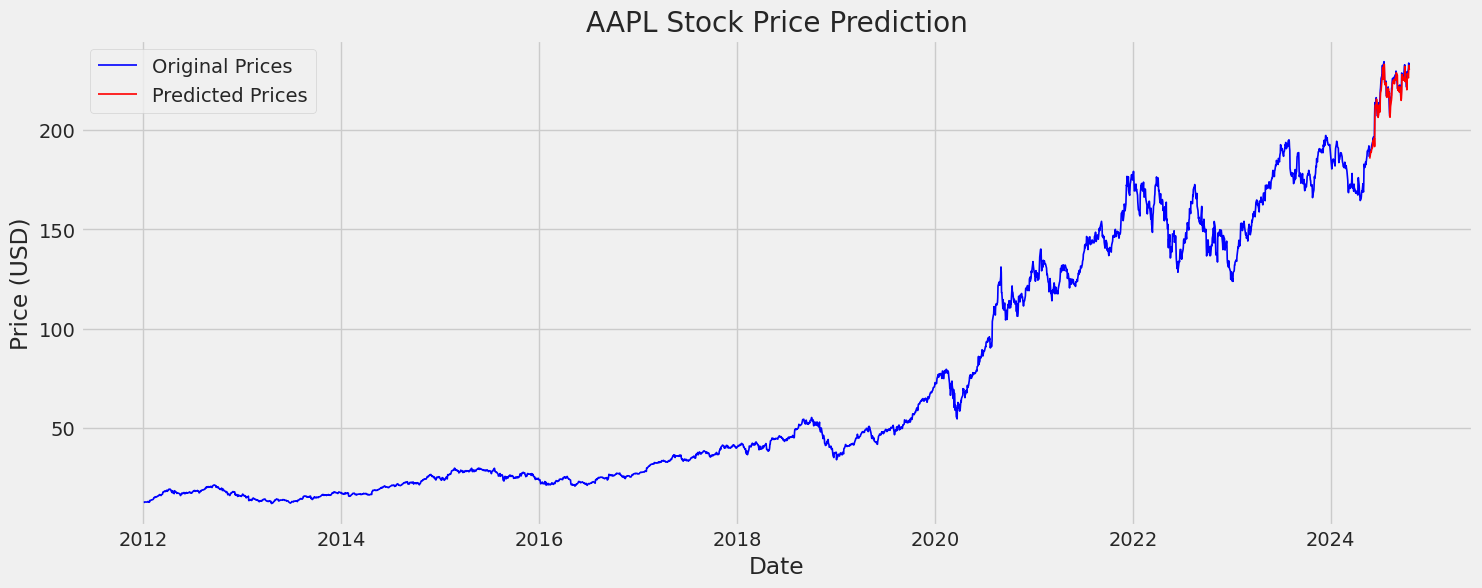

In [ ]:
##### Step 18: Plot the entire closing price history & Compare it to your predictions ######
import matplotlib.pyplot as plt

# Prepare data for plotting
train_size = len(train_data)
test_size = len(test_data)

# Generate timeline for the data
train_timeline = np.arange(train_size)
test_timeline = np.arange(train_size, train_size + test_size - look_back)

# Create the plot
plt.figure(figsize=(16, 6))

# Plot the original closing price history (scaled back to original)
plt.plot(stock_data.index, stock_data['Close'], label='Original Prices', color='blue', linewidth=1.2)

# Plot the predictions (on the test data)
plt.plot(stock_data.index[-test_size+look_back:], predictions_rescaled, label='Predicted Prices', color='red', linewidth=1.2)

# Customize the plot
plt.title(f"{sym} Stock Price Prediction")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


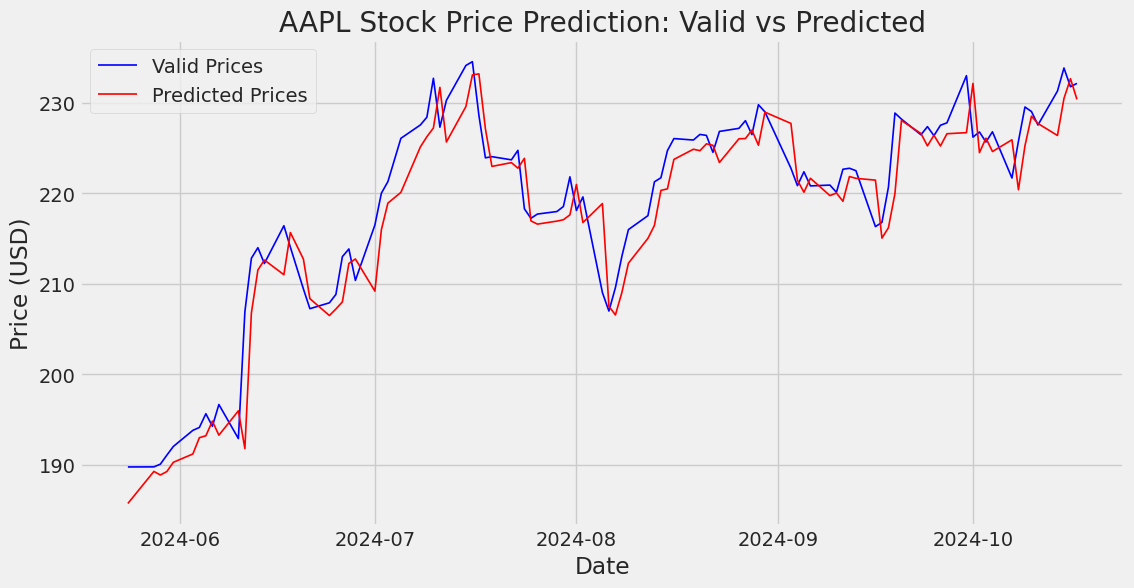

In [ ]:
# Show the valid and predicted prices

# Plot the valid (true) and predicted prices for the test set
plt.figure(figsize=(12, 6))

# Plot true (valid) prices
plt.plot(stock_data.index[-test_size+look_back:], true_values_rescaled, label='Valid Prices', color='blue', linewidth=1.2)

# Plot predicted prices
plt.plot(stock_data.index[-test_size+look_back:], predictions_rescaled, label='Predicted Prices', color='red', linewidth=1.2)

# Customize the plot
plt.title(f"{sym} Stock Price Prediction: Valid vs Predicted")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Optional
You have the opportunity to develop an autoregressive model based on the concepts you learned in class and subsequently train it. Following that, you can compare its performance with that of the LSTM model

In [ ]:
#### Bonus ####
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
# Download stock data from yfinance
data = yf.download("AAPL", start="2015-01-01", end="2023-01-01")
prices = data['Close'].values  # Using the 'Close' prices for AR model


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Normalize data for better performance (Optional)
normalized_prices = (prices - np.mean(prices)) / np.std(prices)

# Train-Test Split (80% train, 20% test)
train_size = int(len(normalized_prices) * 0.8)
train, test = normalized_prices[:train_size], normalized_prices[train_size:]

# Function to create lagged data for AR model
def create_lagged_data(series, lags):
    X, y = [], []
    for i in range(lags, len(series)):
        X.append(series[i-lags:i])
        y.append(series[i])
    return np.array(X), np.array(y)

# Predict function using learned coefficients
def predict_ar(X, phi):
    return X @ phi

# Create lagged data with p lags
p = 5  # You can tune the number of lags
X_train, y_train = create_lagged_data(train, p)

# Solve for AR coefficients (using Normal Equation for OLS)
phi = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
# Make predictions on the test set
X_test, y_test = create_lagged_data(test, p)
ar_predictions = predict_ar(X_test, phi)

# Calculate the Mean Squared Error
ar_mse = mean_squared_error(y_test, ar_predictions)
print(f'Manual AR Model MSE: {ar_mse}')



Manual AR Model MSE: 0.0038177341325358947


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape train data for LSTM [samples, time steps, features]
train_reshaped = train.reshape((train.shape[0], 1, 1))
test_reshaped = test.reshape((test.shape[0], 1, 1))

# LSTM model definition
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM model
lstm_model.fit(train_reshaped, train, epochs=200, verbose=0)

# Make predictions with LSTM
lstm_predictions = lstm_model.predict(test_reshaped, verbose=0)

# Calculate LSTM MSE
lstm_mse = mean_squared_error(test[p:], lstm_predictions[:len(test[p:])])
print(f'LSTM Model MSE: {lstm_mse}')


LSTM Model MSE: 0.018987455023333252


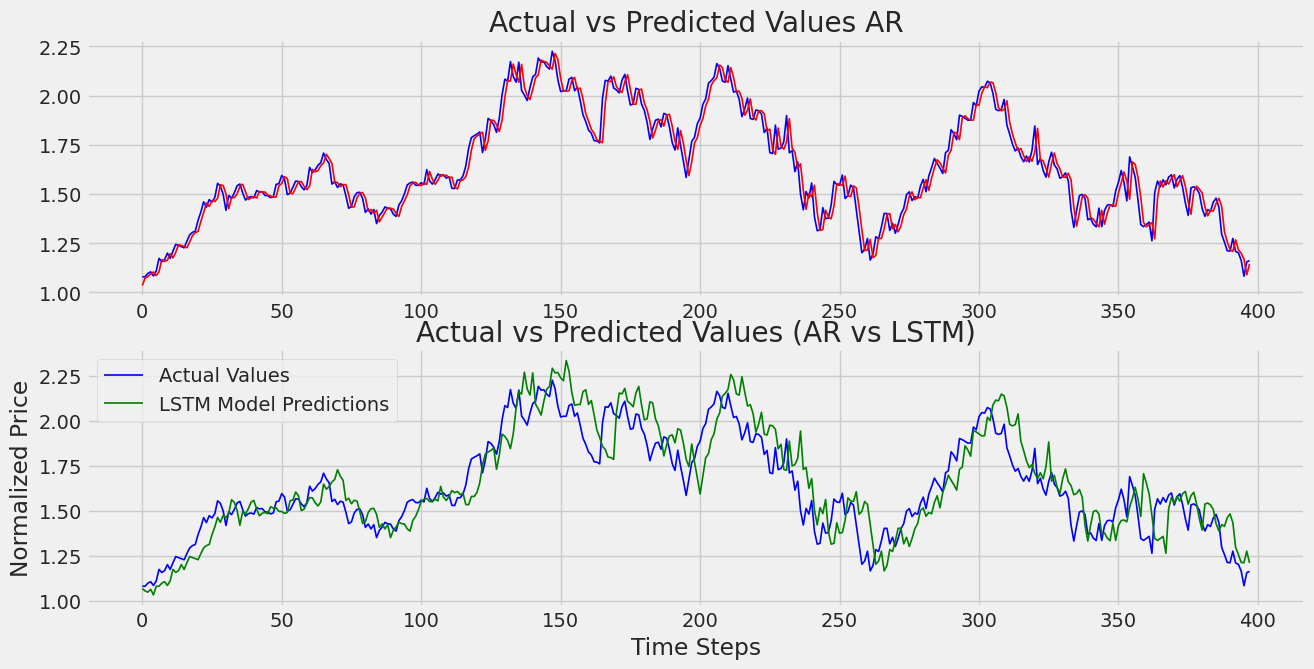

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values for AR model
plt.figure(figsize=(14, 7))
plt.subplot(2,1,1)
plt.title('Actual vs Predicted Values AR')
plt.plot(range(len(test[p:])), test[p:], label='Actual Values', color='blue', linewidth=1.2)
plt.plot(range(len(ar_predictions)), ar_predictions, label='AR Model Predictions', color='red', linewidth=1.2)

plt.subplot(2,1,2)
plt.title('Actual vs Predicted Values vs LSTM')
plt.plot(range(len(test[p:])), test[p:], label='Actual Values', color='blue', linewidth=1.2)
plt.plot(range(len(lstm_predictions[:len(test[p:])])), lstm_predictions[:len(test[p:])], label='LSTM Model Predictions', color='green', linewidth=1.2)

# Add title and labels
plt.title('Actual vs Predicted Values (AR vs LSTM)')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Price')
plt.legend()

# Show the plot
plt.show()


------------------------------------------------------------
*********************************************************
-------------------------------------------------------------
# Question 2 : PixelCNN

In this question, we implement an autoregressive likelihood model for the task of image modeling. Our implementation will focus on the PixelCNN [2] model. Most current SOTA models use PixelCNN as their fundamental architecture, and various additions have been proposed to improve the performance (e.g. PixelCNN++ and PixelSNAIL).


## Import Libraries and Requirements
First of all, we need to import our standard libraries. We will use PyTorch Lightning here for the training process.

In [2]:
## Standard libraries
import os
import math
import numpy as np

## Imports for plotting
import matplotlib.pyplot as plt
plt.set_cmap('cividis')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import seaborn as sns

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional
import torch.utils.data as data
import torch.optim
# Torchvision
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms
# PyTorch Lightning
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint

# Path to the folder where the datasets are/should be downloaded (e.g. MNIST)
DATASET_PATH = "../data"

# Setting the seed
pl.seed_everything(42)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Fetching the device that will be used throughout this notebook
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")
print("Using device", device)

<ipython-input-2-10258cdd2db8>:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export
INFO:lightning_fabric.utilities.seed:Seed set to 42


Using device cpu


<Figure size 640x480 with 0 Axes>

The next cell is for the further usages. Just run it!

In [3]:
# Create checkpoint path if it doesn't exist yet
os.makedirs('../saved_model', exist_ok=True)

## Load the Data
We will work on the MNIST dataset and use 8-bits per pixel (values between 0 and 255). The dataset is loaded below:

In [4]:
# Convert images from 0-1 to 0-255 (integers). We use the long datatype as we will use the images as labels as well
def discretize(sample):
    return (sample * 255).to(torch.long)

# Transformations applied on each image => only make them a tensor
transform = transforms.Compose([transforms.ToTensor(),
                                discretize])

# Loading the training dataset. We need to split it into a training and validation part
train_dataset = MNIST(root=DATASET_PATH, train=True, transform=transform, download=True)
pl.seed_everything(42)
train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])

# Loading the test set
test_set = MNIST(root=DATASET_PATH, train=False, transform=transform, download=True)

# We define a set of data loaders that we can use for various purposes later.
train_loader = data.DataLoader(train_set, batch_size=128, shuffle=True, drop_last=True, pin_memory=True, num_workers=4)
val_loader = data.DataLoader(val_set, batch_size=128, shuffle=False, drop_last=False, num_workers=4)
test_loader = data.DataLoader(test_set, batch_size=128, shuffle=False, drop_last=False, num_workers=4)

INFO:lightning_fabric.utilities.seed:Seed set to 42


A good practice is to always visualize some data examples to get an intuition of the data. You should complete the following function to do so:

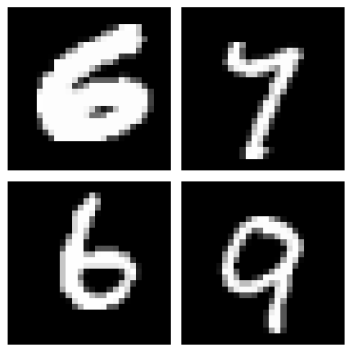

In [5]:
def show_imgs(imgs):
    """
    Function to display images in a grid.
    TODO: Implement the function that displays 'imgs' in a grid.

    Args:
    - imgs: a batch of images in tensor format or a list of images

    You can use matplotlib or other libraries to visualize the images.
    """
    # Define the grid size
    grid_size = int(len(imgs)**0.5)
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(5, 5))

    for i, ax in enumerate(axes.flatten()):
        if i < len(imgs):
            ax.imshow(imgs[i].squeeze(), cmap='gray')
            ax.axis('off')

    plt.tight_layout()


show_imgs([train_set[i][0] for i in range(8)])

## Masked Autoregressive Convolutions

The core module of PixelCNN is its masked convolutions. In contrast to language models, we don't apply an LSTM on each pixel one-by-one. This would be inefficient because images are grids instead of sequences. Thus, it is better to rely on convolutions that have shown great success in deep CNN classification models.

Nevertheless, we cannot just apply standard convolutions without any changes. Remember that during training of autoregressive models, we want to use teacher forcing which both helps the model training, and significantly reduces the time needed for training. For image modeling, teacher forcing is implemented by using a training image as input to the model, and we want to obtain as output the prediction for each pixel based on only its predecessors. Thus, we need to ensure that the prediction for a specific pixel can only be influenced by its predecessors and not by its own value or any "future" pixels. For this, we apply convolutions with a mask.

Which mask we use depends on the ordering of pixels we decide on, i.e. which is the first pixel we predict, which is the second one, etc. The most commonly used ordering is to denote the upper left pixel as the start pixel, and sort the pixels row by row, as shown in the visualization at the top of the assignment. Thus, the second pixel is on the right of the first one (first row, second column), and once we reach the end of the row, we start in the second row, first column. If we now want to apply this to our convolutions, we need to ensure that the prediction of pixel 1 is not influenced by its own "true" input, and all pixels on its right and in any lower row. In convolutions, this means that we want to set those entries of the weight matrix to zero that take pixels on the right and below into account. As an example for a $5\times 5$ kernel, see a mask below (figure credit - Aaron van den Oord):

<center style=\"padding: 10px\"><img src="Masked_Conv.svg" width="200px"></center>

Before looking into the application of masked convolutions in PixelCNN in detail, let's first implement a module that allows us to apply an arbitrary mask to a convolution:

In [6]:
class MaskedConvolution(nn.Module):

    def __init__(self, c_in, c_out, mask, **kwargs):
        """
        Implements a convolution with mask applied on its weights.
        Inputs:
            c_in - Number of input channels
            c_out - Number of output channels
            mask - Tensor of shape [kernel_size_H, kernel_size_W] with 0s where
                   the convolution should be masked, and 1s otherwise.
            kwargs - Additional arguments for the convolution
        """
        super().__init__()
        # For simplicity: calculate padding automatically
        kernel_size = (mask.shape[0], mask.shape[1])
        dilation = 1 if "dilation" not in kwargs else kwargs["dilation"]
        padding = tuple([dilation*(kernel_size[i]-1)//2 for i in range(2)])
        # Actual convolution
        self.conv = nn.Conv2d(c_in, c_out, kernel_size, padding=padding, **kwargs)

        # Mask as buffer => it is no parameter but still a tensor of the module
        # (must be moved with the devices)
        self.register_buffer('mask', mask[None,None])

    def forward(self, x):
        self.conv.weight.data *= self.mask # Ensures zero's at masked positions
        return self.conv(x)

-------------------------------------------------------------------------------
## Vertical and horizontal convolution stacks

To build our own autoregressive image model, we could simply stack a few masked convolutions on top of each other. This was actually the case for the original PixelCNN model, but this leads to a considerable issue. When sequentially applying a couple of masked convolutions, the receptive field of a pixel show to have a "blind spot" on the right upper side, as shown in the figure below (figure credit - Aaron van den Oord et al.):

<center style="padding: 10px"><img src="PCNN_BlindSpot.svg" height="300px"></center>

Although a pixel should be able to take into account all other pixels above and left of it, a stack of masked convolutions does not allow us to look to the upper pixels on the right. This is because the features of the pixels above, which we use for convolution, do not contain any information of the pixels on the right of the same row. If they would, we would be "cheating" and actually looking into the future. To overcome this issue, van den Oord et. al proposed to split the convolutions into a vertical and a horizontal stack. The vertical stack looks at all pixels above the current one, while the horizontal takes into account all on the left. While keeping both of them separate, we can actually look at the pixels on the right with the vertical stack without breaking any of our assumptions. The two convolutions are also shown in the figure above.

Let us implement them here as follows:

In [7]:
import torch
import torch.nn as nn

class VerticalStackConvolution(MaskedConvolution):

    def __init__(self, c_in, c_out, kernel_size=3, mask_center=False, **kwargs):
        """
        Creates a vertical stack masked convolution where pixels below are masked out.
        Inputs:
            c_in - Number of input channels
            c_out - Number of output channels
            kernel_size - Size of the convolution kernel
            mask_center - If True, mask out the center pixel as well
        """
        # TODO: Create the mask for vertical stack convolution
        mask = torch.ones(kernel_size, kernel_size)
        # TODO: Mask out all pixels below the current row
        mask[kernel_size//2+1:,:] = 0
        # TODO: Mask out the center row if mask_center is True
        if mask_center:
            mask[kernel_size//2,:] = 0
        super().__init__(c_in, c_out, mask, **kwargs)


class HorizontalStackConvolution(MaskedConvolution):

    def __init__(self, c_in, c_out, kernel_size=3, mask_center=False, **kwargs):
        """
        Creates a horizontal stack masked convolution where pixels to the right are masked out.
        Inputs:
            c_in - Number of input channels
            c_out - Number of output channels
            kernel_size - Size of the convolution kernel
            mask_center - If True, mask out the center pixel as well
        """
        # TODO: Create the mask for horizontal stack convolution
        mask = torch.ones(1,kernel_size)
        # TODO: Mask out all pixels to the right of the current pixel
        mask[0,kernel_size//2+1:] = 0
        # TODO: Mask out the center pixel if mask_center is True
        if mask_center:
            mask[0,kernel_size//2] = 0
        super().__init__(c_in, c_out, mask, **kwargs)

Note that we have an input argument called `mask_center`. Remember that the input to the model is the actual input image. Hence, the very first convolution we apply cannot use the center pixel as input, but must be masked. All consecutive convolutions, however, should use the center pixel as we otherwise lose the features of the previous layer. Hence, the input argument `mask_center` is True for the very first convolutions, and False for all others.

## Visualizing the receptive field

To validate our implementation of masked convolutions, we can visualize the receptive field we obtain with such convolutions. We should see that with increasing number of convolutional layers, the receptive field grows in both vertical and horizontal direction, without the issue of a blind spot. The receptive field can be empirically measured by backpropagating an arbitrary loss for the output features of a speicifc pixel with respect to the input. We implement this idea below, and visualize the receptive field below.

<font color='red'> DO NOT edit cells of this section </font>

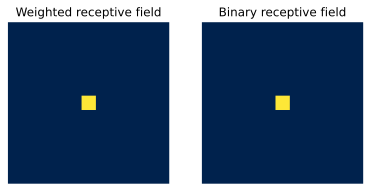

In [12]:
inp_img = torch.zeros(1, 1, 11, 11)
inp_img.requires_grad_()

def show_center_recep_field(img, out):
    """
    Calculates the gradients of the input with respect to the output center pixel,
    and visualizes the overall receptive field.
    Inputs:
        img - Input image for which we want to calculate the receptive field on.
        out - Output features/loss which is used for backpropagation, and should be
              the output of the network/computation graph.
    """
    # Determine gradients
    loss = out[0,:,img.shape[2]//2,img.shape[3]//2].sum() # L1 loss for simplicity
    loss.backward(retain_graph=True) # Retain graph as we want to stack multiple layers and show the receptive field of all of them
    img_grads = img.grad.abs()
    img.grad.fill_(0) # Reset grads

    # Plot receptive field
    img = img_grads.squeeze().cpu().numpy()
    fig, ax = plt.subplots(1,2)
    pos = ax[0].imshow(img)
    ax[1].imshow(img>0)
    # Mark the center pixel in red if it doesn't have any gradients (should be the case for standard autoregressive models)
    show_center = (img[img.shape[0]//2,img.shape[1]//2] == 0)
    if show_center:
        center_pixel = np.zeros(img.shape + (4,))
        center_pixel[center_pixel.shape[0]//2,center_pixel.shape[1]//2,:] = np.array([1.0, 0.0, 0.0, 1.0])
    for i in range(2):
        ax[i].axis('off')
        if show_center:
            ax[i].imshow(center_pixel)
    ax[0].set_title("Weighted receptive field")
    ax[1].set_title("Binary receptive field")
    plt.show()
    plt.close()

show_center_recep_field(inp_img, inp_img)

Let's first visualize the receptive field of a horizontal convolution without the center pixel. We use a small, arbitrary input image (pixels), and calculate the loss for the center pixel. For simplicity, we initialize all weights with 1 and the bias with 0, and use a single channel. This is sufficient for our visualization purposes.

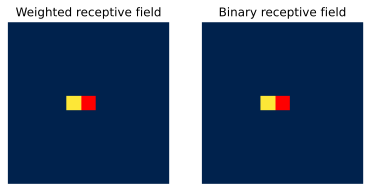

In [13]:
horiz_conv = HorizontalStackConvolution(c_in=1, c_out=1, kernel_size=3, mask_center=True)
horiz_conv.conv.weight.data.fill_(1)
horiz_conv.conv.bias.data.fill_(0)
horiz_img = horiz_conv(inp_img)
show_center_recep_field(inp_img, horiz_img)

The receptive field is shown in yellow, the center pixel in red, and all other pixels outside of the receptive field are dark blue. As expected, the receptive field of a single horizontal convolution with the center pixel masked and a
 kernel is only the pixel on the left. If we use a larger kernel size, more pixels would be taken into account on the left.

Next, let's take a look at the vertical convolution:

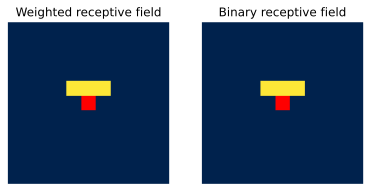

In [14]:
vert_conv = VerticalStackConvolution(c_in=1, c_out=1, kernel_size=3, mask_center=True)
vert_conv.conv.weight.data.fill_(1)
vert_conv.conv.bias.data.fill_(0)
vert_img = vert_conv(inp_img)
show_center_recep_field(inp_img, vert_img)

The vertical convolution takes all pixels above into account. Combining these two, we get the $L$-shaped receptive field of the original masked convolution:

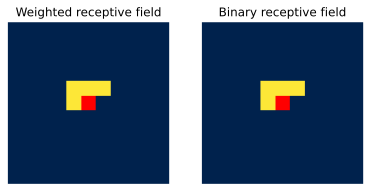

In [15]:
horiz_img = vert_img + horiz_img
show_center_recep_field(inp_img, horiz_img)

If we stack multiple horizontal and vertical convolutions, we need to take two aspects into account:

The center should not be masked anymore for the following convolutions as the features at the pixel's position are already independent of its actual value. If it is hard to imagine why we can do this, just change the value below to `mask_center=True` and see what happens.
The vertical convolution is not allowed to work on features from the horizontal convolution. In the feature map of the horizontal convolutions, a pixel contains information about all of the "true" pixels on the left. If we apply a vertical convolution which also uses features from the right, we effectively expand our receptive field to the true input which we want to prevent. Thus, the feature maps can only be merged for the horizontal convolution.
Using this, we can stack the convolutions in the following way. We have two feature streams: one for the vertical stack, and one for the horizontal stack. The horizontal convolutions can operate on the joint features of the previous horizontals and vertical convolutions, while the vertical stack only takes its own previous features as input. For a quick implementation, we can therefore sum the horizontal and vertical output features at each layer, and use those as final output features to calculate the loss on. An implementation of 4 consecutive layers is shown below. Note that we reuse the features from the other convolutions with `mask_center=True` from above.

Layer 2


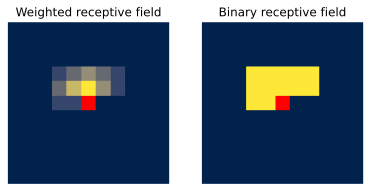

Layer 3


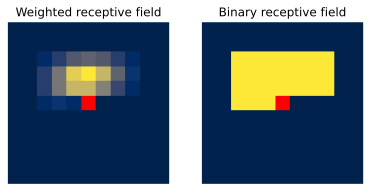

Layer 4


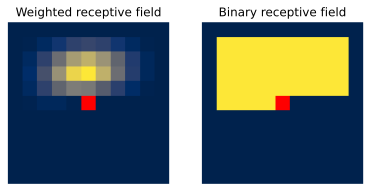

Layer 5


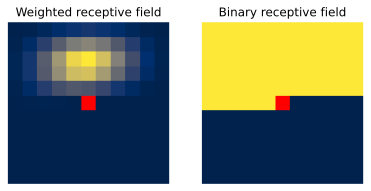

In [16]:
# Initialize convolutions with equal weight to all input pixels
horiz_conv = HorizontalStackConvolution(c_in=1, c_out=1, kernel_size=3, mask_center=False)
horiz_conv.conv.weight.data.fill_(1)
horiz_conv.conv.bias.data.fill_(0)
vert_conv = VerticalStackConvolution(c_in=1, c_out=1, kernel_size=3,mask_center=False)
vert_conv.conv.weight.data.fill_(1)
vert_conv.conv.bias.data.fill_(0)

# We reuse our convolutions for the 4 layers here. Note that in a standard network,
# we don't do that, and instead learn 4 separate convolution. As this cell is only for
# visualization purposes, we reuse the convolutions for all layers.
for l_idx in range(4):
    vert_img = vert_conv(vert_img)
    horiz_img = horiz_conv(horiz_img) + vert_img
    print(f"Layer {l_idx+2}")
    show_center_recep_field(inp_img, horiz_img)

Layer 2


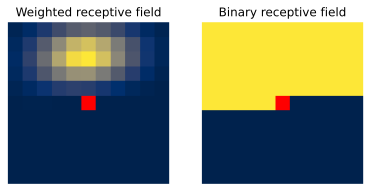

Layer 3


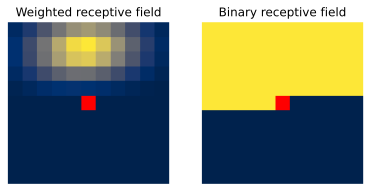

Layer 4


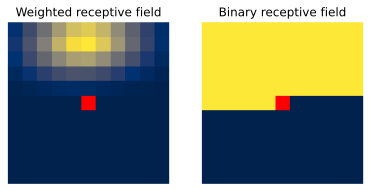

Layer 5


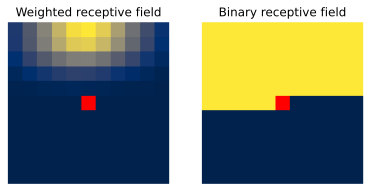

In [17]:
# Initialize convolutions with equal weight to all input pixels
horiz_conv = HorizontalStackConvolution(c_in=1, c_out=1, kernel_size=3, mask_center=False)
horiz_conv.conv.weight.data.fill_(1)
horiz_conv.conv.bias.data.fill_(0)
vert_conv = VerticalStackConvolution(c_in=1, c_out=1, kernel_size=3, mask_center=False)
vert_conv.conv.weight.data.fill_(1)
vert_conv.conv.bias.data.fill_(0)

# We reuse our convolutions for the 4 layers here. Note that in a standard network,
# we don't do that, and instead learn 4 separate convolution. As this cell is only for
# visualization purposes, we reuse the convolutions for all layers.
for l_idx in range(4):
    vert_img = vert_conv(vert_img)
    horiz_img = horiz_conv(horiz_img) + vert_img
    print(f"Layer {l_idx+2}")
    show_center_recep_field(inp_img, horiz_img)

The receptive field above it visualized for the horizontal stack, which includes the features of the vertical convolutions. It grows over layers without any blind spot as we had before. The difference between "weighted" and "binary" receptive field is that for the latter, we check whether there are any gradients flowing back to this pixel. This indicates that the center pixel indeed can use information from this pixel. Nevertheless, due to the convolution weights, some pixels have a stronger effect on the prediction than others. This is visualized in the weighted receptive field by plotting the gradient magnitude for each pixel instead of a binary yes/no.

Another receptive field we can check is the one for the vertical stack as the one above is for the horizontal stack. Let's visualize it below:

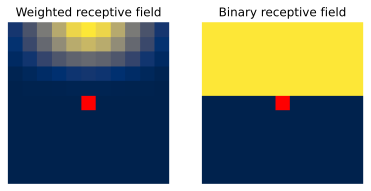

In [14]:
show_center_recep_field(inp_img, vert_img)

As we have discussed before, the vertical stack only looks at pixels above the one we want to predict. Hence, we can validate that our implementation works as we initially expected it to. As a final step, let's clean up the computation graph we still had kept in memory for the visualization of the receptive field:

In [18]:
del inp_img, horiz_conv, vert_conv

## Gated Convolutions

For visualizing the receptive field, we assumed a very simplified stack of vertical and horizontal convolutions. Obviously, there are more sophisticated ways of doing it, and PixelCNN uses gated convolutions for this. Specifically, the Gated Convolution block in PixelCNN looks as follows:

<center width="100%" style="padding: 10px"><img src="PCNN_GatedConv.svg" height="300px"></center>

The left path is the vertical stack (the $N\times N$ convolution is masked correspondingly), and the right path is the horizontal stack. Gated convolutions are implemented by having a twice as large output channel size, and combine them by a element-wise multiplication of $\tanh$ and a sigmoid. For a linear layer, we can express a gated activation unit as follows:

$$\mathbf{y} = \tanh\left(\mathbf{W}_{f}\mathbf{x}\right)\odot\sigma\left(\mathbf{W}_{g}\mathbf{x}\right)$$

For simplicity, biases have been neglected and the linear layer split into two part, $\mathbf{W}_{f}$ and $\mathbf{W}_{g}$. This concept resembles the input and modulation gate in an LSTM, and has been used in many other architectures as well. The main motivation behind this gated activation is that it might allow to model more complex interactions and simplifies learning. But as in any other architecture, this is mostly a design choice and can be considered a hyperparameters.

Besides the gated convolutions, we also see that the horizontal stack uses a residual connection while the vertical stack does not. This is because we use the output of the horizontal stack for prediction. Each convolution in the vertical stack also receives a strong gradient signal as it is only two $1\times 1$ convolutions away from the residual connection, and does not require another residual connection to all its earleri layers.

The implementation in PyTorch is fairly straight forward for this block, because the visualization above gives us a computation graph to follow:

In [19]:
class GatedMaskedConv(nn.Module):

    def __init__(self, c_in, **kwargs):
        """
        Gated Convolution block implementing the computation graph.
        """
        super().__init__()

        # Initialize vertical and horizontal stack convolutions
        self.conv_vert = VerticalStackConvolution(c_in, c_out=2*c_in, **kwargs)
        self.conv_horiz = HorizontalStackConvolution(c_in, c_out=2*c_in, **kwargs)

        # TODO: Add a 1x1 convolution to pass information from vertical stack to horizontal stack
        # Hint: Use nn.Conv2d with 2*c_in channels for both input and output
        self.conv_vert_to_horiz = nn.Conv2d(2*c_in, 2*c_in, kernel_size=1, padding=0)

        # TODO: Add a 1x1 convolution at the output of the horizontal stack
        # Hint: Use nn.Conv2d with c_in channels for both input and output
        self.conv_horiz_1x1 = nn.Conv2d(c_in, c_in, kernel_size=1, padding=0)

    def forward(self, v_stack, h_stack):
        # Vertical stack (left)
        v_stack_feat = self.conv_vert(v_stack)
        # TODO: Split the vertical stack features into value and gate using chunk
        v_stack_feat = self.conv_vert(v_stack)
        v_val, v_gate = v_stack_feat.chunk(2, dim=1)
        # TODO: Apply gated activation to the value and gate
        v_stack_out = torch.tanh(v_val) * torch.sigmoid(v_gate)
        # Horizontal stack (right)
        h_stack_feat = self.conv_horiz(h_stack)
        # TODO: Add the transformed vertical stack features to the horizontal stack
        h_stack_feat = self.conv_horiz(h_stack)
        h_stack_feat = h_stack_feat + self.conv_vert_to_horiz(v_stack_feat)
        # TODO: Split the horizontal stack features into value and gate using chunk
        h_val, h_gate = h_stack_feat.chunk(2, dim=1)
        # TODO: Apply gated activation to the value and gate
        h_stack_feat = torch.tanh(h_val) * torch.sigmoid(h_gate)
        # TODO: Apply the 1x1 convolution to the horizontal stack output
        h_stack_out = self.conv_horiz_1x1(h_stack_feat)
        # TODO: Add residual connection to the horizontal stack output
        h_stack_out = h_stack_out + h_stack


        return v_stack_out, h_stack_out

## Building the model

Using the gated convolutions, we can now build our PixelCNN model. The architecture consists of multiple stacked GatedMaskedConv blocks, where we add an additional dilation factor to a few convolutions. This is used to increase the receptive field of the model and allows to take a larger context into accout during generation. Dilation on a convolution works looks as follows:

<center width=\"100%\"><img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/dilation.gif" width="250px"></center>

Note that the smaller output size is only because the animation assumes no padding. In our implementation, we will pad the input image correspondingly. Alternatively to dilated convolutions, we could downsample the input and use a encoder-decoder architecture as in PixelCNN++ [3]. This is especially beneficial if we want to build a very deep autoregressive model. Nonetheless, as we seek to train a reasonably small model, dilated convolutions are the more efficient option to use here.

Below, we implement the PixelCNN model as a PyTorch Lightning module. Besides the stack of gated convolutions, we also have the initial horizontal and vertical convolutions which mask the center pixel, and a final $1\times 1$ convolution which maps the output features to class predictions. To determine the likelihood of a batch of images, we first create our initial features using the masked horizontal and vertical input convolution. Next, we forward the features through the stack of gated convolutions. Finally, we take the output features of the horizontal stack, and apply the $1\times 1$ convolution for classification. We use the bits per dimension metric for the likelihood.

In [20]:
class PixelCNN(pl.LightningModule):

    def __init__(self, c_in, c_hidden):
        super().__init__()
        self.save_hyperparameters()

        # Initial convolutions skipping the center pixel
        # TODO: Initialize vertical stack convolution
        # TODO: Initialize horizontal stack convolution
        self.conv_vstack = VerticalStackConvolution(c_in, c_hidden, mask_center=True)
        self.conv_hstack = HorizontalStackConvolution(c_in, c_hidden, mask_center=True)

        # TODO: Create a list of GatedMaskedConv layers with different dilations.
        # Hint: Use nn.ModuleList to store the layers
        dilations = [ 1,2,1,4,1,2,1]
        self.conv_layers = nn.ModuleList()
        for dilation in dilations:
            self.conv_layers.append(
                GatedMaskedConv(c_hidden, dilation=dilation)
            )
        #self.conv_layers = nn.ModuleList([
        #    GatedMaskedConv(c_hidden),
        #    GatedMaskedConv(c_hidden, dilation=2),
        #    GatedMaskedConv(c_hidden),
        #    GatedMaskedConv(c_hidden, dilation=4),
        #    GatedMaskedConv(c_hidden),
        #    GatedMaskedConv(c_hidden, dilation=2),
        #    GatedMaskedConv(c_hidden)
        #])

        # Output classification convolution (1x1)
        self.conv_out = nn.Conv2d(c_hidden, c_in * 256, kernel_size=1, padding=0)

        self.example_input_array = train_set[0][0][None]  # Optional, for showing an example input in PyTorch Lightning

    def forward(self, x):
        """
        Forward image through model and return logits for each pixel.
        Inputs:
            x - Image tensor with integer values between 0 and 255.
        """
        # TODO: Scale input from 0-255 to -1 to 1
        x = (x.float() / 255.0) * 2 - 1

        # TODO: Apply the initial vertical and horizontal stack convolutions to x
        v_stack = self.conv_vstack(x)
        h_stack = self.conv_hstack(x)

        # Gated Convolutions
        for layer in self.conv_layers:
            # TODO: Pass the vertical and horizontal stacks through each layer
            v_stack, h_stack = layer(v_stack, h_stack)

        # TODO: Apply ELU activation and 1x1 convolution to the horizontal stack output
        # out = ...
        out = self.conv_out(torch.nn.functional.elu(h_stack))

        # TODO: Reshape the output to match the pixel classification problem, Output dimensions: [Batch, Classes, Channels, Height, Width]
        # out = ...
        out = out.reshape(out.shape[0], 256, out.shape[1]//256, out.shape[2], out.shape[3])

        return out

    def calc_likelihood(self, x):
        # TODO: Implement the forward pass and calculate the negative log-likelihood
        # Hint: Use F.cross_entropy to compute the loss and return bpd
        # pass

        pred = self.forward(x) #  the probability vector
        nll = torch.nn.functional.cross_entropy(pred, x, reduction='none')
        bpd = nll.mean(dim=[1,2,3]) * np.log2(np.exp(1))
        return bpd.mean()


    @torch.no_grad()
    def sample(self, img_shape, img=None):
        """
        Sampling function for the autoregressive model.
        Inputs:
            img_shape - Shape of the image to generate (B,C,H,W)
            img (optional) - If given, this tensor will be used as
            a starting image. The pixels to fill
            should be -1 in the input tensor.
        """
        # TODO: Initialize the image with zeros if img is None
        if img is None:
            img = torch.zeros(img_shape, dtype=torch.long).to(device) - 1

        # Generation loop
        for h in tqdm(range(img_shape[2]), leave=False):
            for w in range(img_shape[3]):
                for c in range(img_shape[1]):
                    # TODO: Skip already filled pixels
                    if (img[:,c,h,w] != -1).all().item():
                        continue

                    # TODO: Predict pixel values and sample from the output distribution
                    pred = self.forward(img[:,:,:h+1,:])
                    probs = torch.nn.functional.softmax(pred[:,:,c,h,w], dim=-1)
                    img[:,c,h,w] = torch.multinomial(probs, num_samples=1).squeeze(dim=-1)

        return img

    def configure_optimizers(self):
        # TODO: Create an Adam optimizer and StepLR scheduler
        # optimizer = ...
        # scheduler = ...
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.99)
        return [optimizer], [scheduler]

    def training_step(self, batch, batch_idx):
        # TODO: Calculate the loss and log it during training
        # loss = ...
        loss = self.calc_likelihood(batch[0])
        self.log('train_bpd', loss)

        return loss

    def validation_step(self, batch, batch_idx):
        # TODO: Calculate the loss and log it during validation
        loss = self.calc_likelihood(batch[0])
        self.log('val_bpd', loss)
        # pass

    def test_step(self, batch, batch_idx):
        # TODO: Calculate the loss and log it during testing
        loss = self.calc_likelihood(batch[0])
        self.log('test_bpd', loss)
        # pass

To sample from the autoregressive model, we need to iterate over all dimensions of the input. We start with an empty image, and fill the pixels one by one, starting from the upper left corner. Note that as for predicting $x_i$, all pixels below it have no influence on the prediction. Hence, we can cut the image in height without changing the prediction while increasing efficiency. Nevertheless, all the loops in the sampling function already show that it will take us quite some time to sample. A lot of computation could be reused across loop iterations as those the features on the already predicted pixels will not change over iterations. Nevertheless, this takes quite some effort to implement, and is often not done in implementations because in the end, autoregressive sampling remains sequential and slow. Hence, we settle with the default implementation here.

Before training the model, we can check the full receptive field of the model on an MNIST image of size $28\times 28$:

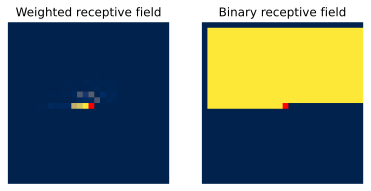

In [21]:
test_model = PixelCNN(c_in=1, c_hidden=64)
inp = torch.zeros(1,1,28,28)
inp.requires_grad_()
out = test_model(inp)
show_center_recep_field(inp, out.squeeze(dim=2))
del inp, out, test_model

The visualization shows that for predicting any pixel, we can take almost half of the image into account. However, keep in mind that this is the "theoretical" receptive field and not necessarily the effective receptive field, which is usually much smaller. For a stronger model, we should therefore try to increase the receptive field even further. Especially, for the pixel on the bottom right, the very last pixel, we would be allowed to take into account the whole image. However, our current receptive field only spans across 1/4 of the image. An encoder-decoder architecture can help with this, but it also shows that we require a much deeper, more complex network in autoregressive models than in VAEs or energy-based models.

## Training loop
To train the model, we again can rely on PyTorch Lightning and write a function below for loading the pretrained model if it exists. **In this section, you may not be able to train the model more than 20 or 30 epochs, as you are using Google Colab or kaggle probably. Consequently, we have saved the pre-trained (with 150 epochs) model for you to use it and write and validate other details of your code (e.g. visualizations, sampling, autocompletions, ...) except building the model and training procedure. Then, just derive your own model (by completing corresponding preious and further sections) and run it to reach some acceptable results. The saved model in "PixelCNN.ckpt"** Moreover, To reduce the computational cost, we have saved the validation and test score in the checkpoint already:

In [22]:
# Path to the folder where the pretrained models are saved
# CHECKPOINT_PATH = "../saved_models/tutorial12"

def train_model(**kwargs):
    # TODO: Create a PyTorch Lightning trainer with the necessary settings

    # trainer = pl.Trainer(default_root_dir=os.path.join('../saved_model', "PixelCNN"),
    #                      ...,
    #                      callbacks=[ModelCheckpoint(save_weights_only=True, mode="min", monitor="val_bpd"),
    #                                 LearningRateMonitor("epoch")])

    # Hint: Set the correct device (GPU/CPU) and define callbacks like ModelCheckpoint and LearningRateMonitor



    trainer = pl.Trainer(default_root_dir=os.path.join('../saved_model', "PixelCNN"),
                         accelerator="gpu" if str(device).startswith("cuda") else "cpu",
                         devices=1,
                         max_epochs=150,
                         callbacks=[ModelCheckpoint(save_weights_only=True, mode="min", monitor="val_bpd"),
                                    LearningRateMonitor("epoch")])
    result = None

    # Path to the pre-trained checkpoint (for example on Kaggle)
    #

    # pretrained_filename = '/kaggle/input/pixelcnn-ckpt/PixelCNN.ckpt'  # TODO: Set the correct path for the pre-trained model
    pretrained_filename = 'PixelCNN.ckpt'  # TODO: Set the correct path for the pre-trained model
    # pretrained_filename = os.path.join(CHECKPOINT_PATH, "PixelCNN.ckpt")


    if os.path.isfile(pretrained_filename):
        print("Found pretrained model, loading...")
        # TODO: Load the pre-trained model from checkpoint using PixelCNN

        model = PixelCNN.load_from_checkpoint(pretrained_filename)
        ckpt = torch.load(pretrained_filename, map_location=device)
        result = ckpt.get("result", None)
        # pass
    else:
        # Initialize PixelCNN with the provided arguments (kwargs)
        model = PixelCNN(**kwargs)

        # TODO: Train the model using trainer.fit and provide the training and validation loaders
        trainer.fit(model, train_loader, val_loader)
        # pass

    # TODO: Move the model to the correct device (CPU or GPU)
    model = model.to(device)


    if result is None:
        # TODO: Test the best model on the validation and test sets using trainer.test
        # Hint: Use the validation and test loaders, and store the results in 'result'
        # pass
        val_result = trainer.test(model, val_loader, verbose=False)
        test_result = trainer.test(model, test_loader, verbose=False)
        result = {"test": test_result, "val": val_result}

    return model, result


In [ ]:
model, result = train_model(c_in=1, c_hidden=64)
test_res = result["test"][0]
print("Test bits per dimension: %4.3fbpd" % (test_res["test_loss"] if "test_loss" in test_res else test_res["test_bpd"]))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:202: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:TPU available: True, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Now, answer the **Question:**

Why considering image modeling as an autoregressive problem simplifies the learning process?

Explain your **Answer:**

In addition, PixelCNN can explicitly predict the pixel values by a discrete softmax while Normalizing Flows (which you will learn further) have to learn transformations in continuous latent space. These two aspects allow the PixelCNN to achieve a notably better performance.

To fully compare the models, let's also measure the number of parameters of the PixelCNN:

In [ ]:
num_params = sum([np.prod(param.shape) for param in model.parameters()])
print("Number of parameters: {:,}".format(num_params))

Compared to the multi-scale normalizing flows, the PixelCNN has considerably less parameters. Of course, the number of parameters depend on our hyperparameter choices. Nevertheless, in general, it can be said that autoregressive models require considerably less parameters than normalizing flows to reach good performance, based on the reasons stated above. Still, autoregressive models are much slower in sampling than normalizing flows, which limits their possible applications.

## Sampling
One way of qualitatively analysing generative models is by looking at the actual samples. Let's therefore use our sampling function to generate a few digits:

In [ ]:
# TODO: Ensure the model is moved to the correct device (GPU or CPU)

# TODO: Set a random seed using pl.seed_everything() for reproducibility

# TODO: Generate samples using the model's sample function with the correct image shape
# Hint: Make sure to move the generated samples to the same device as the model

# TODO: Display the generated samples using show_imgs()
# Hint: Move samples back to the CPU if needed for visualization

Most of the samples should be identified as digits. This goes along with the lower likelihood we achieved with autoregressive models. Nevertheless, we also see that there is still place for improvement as a considerable amount of samples cannot be identified. Deeper autoregressive models are expected to achieve better quality, as they can take more context into account for generating the pixels.

Note that on Google Colab or Kaggle, you might see different results, specifically with a white line at the top. After some debugging, it seemed that the difference occurs inside the dilated convolution, as it gives different results for different batch sizes. However, it is hard to debug this further as it might be a bug of the installed PyTorch version on them.

The trained model itself is not restricted to any specific image size. However, what happens if we actually sample a larger image than we had seen in our training dataset? Let's try below to sample images of size $64\times 64$ instead of $28\times 28$:

In [ ]:
# TODO: Fill it like previous cell

Now, answer the **Question:**

What do you see in the results? Why do you think it is like that? Justify your answer.

Explain your **Answer:**

## Autocompletion
One common application done with autoregressive models is auto-completing an image. As autoregressive models predict pixels one by one, we can set the first $N$ pixels to predefined values and check how the model completes the image. For implementing this, we just need to skip the iterations in the sampling loop that already have a value unequals -1. In the cell below, we randomly take three images from the training set, mask about the lower half of the image, and let the model autocomplete it. To see the diversity of samples, we do this 12 times for each image:

In [ ]:
def autocomplete_image(img):
    # TODO: Create a copy of the image (img.clone()) and set the lower half of the image to -1

    print("Original image and input image to sampling:")
    # TODO: Display the original and modified input images using show_imgs

    # TODO: Generate 12 copies of the incomplete image for sampling using img_init.unsqueeze and repeat
    # Hint: Ensure the images are moved to the correct device

    # TODO: Set a random seed for reproducibility before sampling

    # TODO: Generate image completions using the model's sample function
    img_generated = ...

    print("Autocompletion samples:")
    show_imgs(img_generated)

# Autocomplete images from the dataset (train_set)
for i in range(1, 4):
    img = train_set[i][0]
    autocomplete_image(img.to(device))


Now, answer the **Question:**

What do you see in the results? Why do you think it is like that? Justify your answer.

Explain your **Answer:**

## References

[1] van den Oord, A., et al. "Pixel Recurrent Neural Networks." arXiv preprint arXiv:1601.06759 (2016).

[2] van den Oord, A., et al. "Conditional Image Generation with PixelCNN Decoders." In Advances in Neural Information Processing Systems 29, pp. 4790–4798 (2016).

[3] Salimans, Tim, et al. "PixelCNN++: Improving the PixelCNN with Discretized Logistic Mixture Likelihood and Other Modifications." arXiv preprint arXiv:1701.05517 (2017).